NAMA : SEPTIA DINI ARIFTA
KELAS : EDA A083
NPM : 23083010040

Missing Value , Deteksi Outlier , dan Mengkategorikan Dataset Supermarket Sales di Negara Myanmar

Dataset ini berasal dari penjualan sebuah perusahaan supermarket yang beroperasi di beberapa cabang di kota Myanmar . Dalam beberapa bulan terakhir, perusahaan ini telah mencatat data penjualan dari tiga cabang yang berbeda. Pertumbuhan supermarket dan kompetisi di pasar yang semakin ketat mendorong pentingnya analisis data penjualan. Dengan menggunakan metode analitik prediktif, dataset ini memberikan peluang untuk memahami perilaku pelanggan dan kinerja penjualan. Informasi Atribut Dataset ini terdiri dari berbagai atribut yang mencerminkan detail transaksi penjualan. Dataset ini memiliki 17 variabel yaitu : Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity	, Tax 5%,	Total,	Date,Time,Payment, cogs,gross margin percentage,gross income	,Rating

In [20]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

Mengunggah dan membaca dataset

In [21]:
uploaded = files.upload()

Saving DATA PENJUALAN.csv to DATA PENJUALAN (1).csv


In [22]:
df = pd.read_csv('/content/DATA PENJUALAN.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


1. Melihat Missing Value

In [23]:
df.isnull().sum()

,0
Invoice ID,2
Branch,2
City,2
Customer type,2
Gender,2
Product line,2
Unit price,2
Quantity,2
Tax 5%,2
Total,2


Membuat Visualisasi untuk melihat berapa banyak dan variabel saja yang terdapat missing value

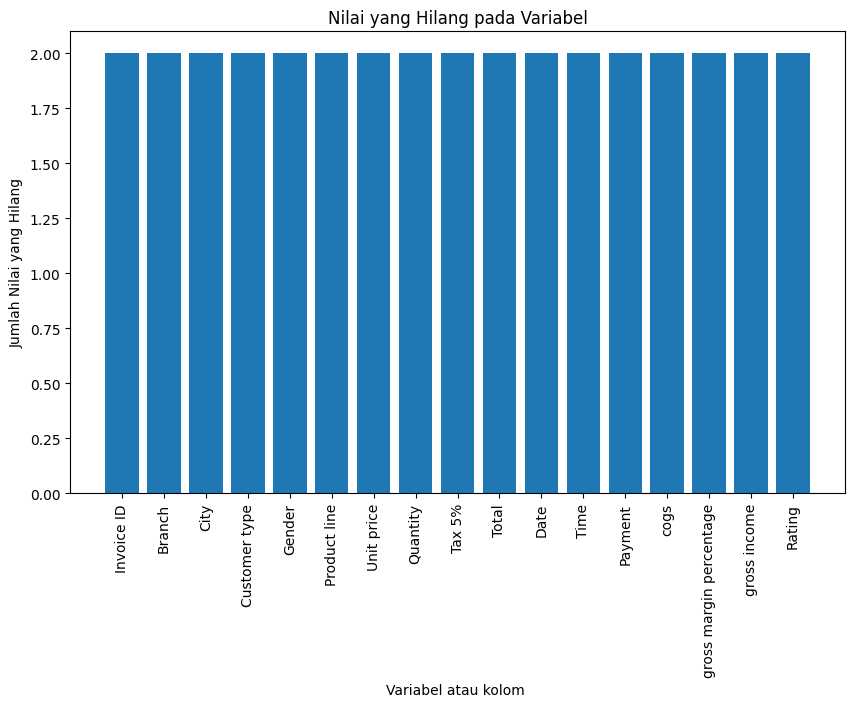

In [24]:


# Menghitung jumlah nilai yang hilang di setiap kolom
missing_values = df.isnull().sum()

# Menyaring hanya kolom yang memiliki nilai yang hilang
missing_values = missing_values[missing_values > 0]

# Membuat grafik batang untuk menampilkan jumlah nilai yang hilang
plt.figure(figsize=(10, 6))
plt.bar(missing_values.index, missing_values.values)
plt.title('Nilai yang Hilang pada Variabel')
plt.xlabel('Variabel atau kolom ')
plt.ylabel('Jumlah Nilai yang Hilang')
plt.xticks(rotation=90)  # Memutar label sumbu x agar lebih mudah dibaca
plt.show()  # Menampilkan grafik


Mengganti Nilai Missing Value Menggunakan median dan modus
Saya mengganti missing value dengan median dan modus karena data ini tidak berdistribusi normal , untuk variabel numerik menggunakan median dan kategorikal menggunakan modus

In [25]:
from scipy.stats import shapiro

for column in df.select_dtypes(include=['number']).columns:
    stat, p = shapiro(df[column].dropna())
    print(f'Shapiro-Wilk Test for {column}: Statistics={stat:.3f}, p-value={p:.3f}')
    if p > 0.05:
        print(f'{column} berdistribusi normal (gagal menolak H0)')
    else:
        print(f'{column} tidak berdistribusi normal (menolak H0)')


Shapiro-Wilk Test for Unit price: Statistics=0.952, p-value=0.000
Unit price tidak berdistribusi normal (menolak H0)
Shapiro-Wilk Test for Quantity: Statistics=0.933, p-value=0.000
Quantity tidak berdistribusi normal (menolak H0)
Shapiro-Wilk Test for Tax 5%: Statistics=0.909, p-value=0.000
Tax 5% tidak berdistribusi normal (menolak H0)
Shapiro-Wilk Test for Total: Statistics=0.909, p-value=0.000
Total tidak berdistribusi normal (menolak H0)
Shapiro-Wilk Test for cogs: Statistics=0.909, p-value=0.000
cogs tidak berdistribusi normal (menolak H0)
Shapiro-Wilk Test for gross margin percentage: Statistics=1.000, p-value=1.000
gross margin percentage berdistribusi normal (gagal menolak H0)
Shapiro-Wilk Test for gross income: Statistics=0.909, p-value=0.000
gross income tidak berdistribusi normal (menolak H0)
Shapiro-Wilk Test for Rating: Statistics=0.958, p-value=0.000
Rating tidak berdistribusi normal (menolak H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


In [26]:
# Mengisi missing values di kolom 'Invoice ID' dengan teks 'Unknown' (jika ada)
df['Invoice ID'].fillna('Unknown', inplace=True)

# Daftar kolom numerik yang akan diisi dengan median
numeric_columns = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']

# Isi missing values di kolom numerik dengan median
for column in numeric_columns:
    df[column].fillna(df[column].median(), inplace=True)

# Daftar kolom non-numerik yang akan diisi dengan modus (nilai paling sering muncul)
categorical_columns = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Date', 'Time', 'Payment']

# Isi missing values di kolom non-numerik dengan modus
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Menampilkan 5 baris pertama dari DataFrame setelah pengisian
df.head()


<ipython-input-26-ec403540afff>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Invoice ID'].fillna('Unknown', inplace=True)
<ipython-input-26-ec403540afff>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


MENGECEK KEMBALI APAKAH MASIH ADA MISSING VALUE SETELAH DI GANTIKAN DENGAN NILAI MEDIAN DAN MODUS

In [27]:
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


2. MENERAPKAN DUMMY VARIABEL

In [28]:
# mengecek banyak baris unique dari semua variabel

for column in df.columns:
  print(f"Unique values in {column}: {df[column].nunique()}")


Unique values in Invoice ID: 1001
Unique values in Branch: 3
Unique values in City: 3
Unique values in Customer type: 2
Unique values in Gender: 2
Unique values in Product line: 6
Unique values in Unit price: 944
Unique values in Quantity: 10
Unique values in Tax 5%: 991
Unique values in Total: 991
Unique values in Date: 89
Unique values in Time: 506
Unique values in Payment: 3
Unique values in cogs: 991
Unique values in gross margin percentage: 1
Unique values in gross income: 991
Unique values in Rating: 61


DUMMY VARIABEL MENGGUNAKAN TRUE FALSE

In [29]:
# Membuat dummy variabel untuk kolom kategorikal
categorical_columns = ['Branch', 'Customer type', 'Gender', 'Payment']

# Membuat dummy variabel
df_dummies = pd.get_dummies(df[categorical_columns], drop_first=True)

# Menggabungkan dengan DataFrame asli
df_final_1 = pd.concat([df, df_dummies], axis=1)

# Menghapus kolom kategorikal asli jika sudah tidak diperlukan
df_final_1.drop(categorical_columns, axis=1, inplace=True)

# Menampilkan DataFrame akhir
print(df_final_1.head())

    Invoice ID       City            Product line  Unit price  Quantity  \
0  750-67-8428     Yangon       Health and beauty       74.69       7.0   
1  226-31-3081  Naypyitaw  Electronic accessories       15.28       5.0   
2  631-41-3108     Yangon      Home and lifestyle       46.33       7.0   
3  123-19-1176     Yangon       Health and beauty       58.22       8.0   
4  373-73-7910     Yangon       Sports and travel       86.31       7.0   

    Tax 5%     Total       Date   Time    cogs  gross margin percentage  \
0  26.1415  548.9715   1/5/2019  13:08  522.83                 4.761905   
1   3.8200   80.2200   3/8/2019  10:29   76.40                 4.761905   
2  16.2155  340.5255   3/3/2019  13:23  324.31                 4.761905   
3  23.2880  489.0480  1/27/2019  20:33  465.76                 4.761905   
4  30.2085  634.3785   2/8/2019  10:37  604.17                 4.761905   

   gross income  Rating  Branch_B  Branch_C  Customer type_Normal  \
0       26.1415     9.1     F

In [30]:
df_final_1.head()

,Invoice ID,City,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating,Branch_B,Branch_C,Customer type_Normal,Gender_Male,Payment_Credit card,Payment_Ewallet
0,750-67-8428,Yangon,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/2019,13:08,522.83,4.761905,26.1415,9.1,False,False,False,False,False,True
1,226-31-3081,Naypyitaw,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/2019,10:29,76.40,4.761905,3.8200,9.6,False,True,True,False,False,False
2,631-41-3108,Yangon,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,13:23,324.31,4.761905,16.2155,7.4,False,False,True,True,True,False
3,123-19-1176,Yangon,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,20:33,465.76,4.761905,23.2880,8.4,False,False,False,True,False,True
4,373-73-7910,Yangon,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/2019,10:37,604.17,4.761905,30.2085,5.3,False,False,True,True,False,True


Dummy Variabel menggunakan 0 dan 1

In [31]:
# Membuat dummy variabel 0 dan 1 untuk kolom kategorikal
categorical_columns = ['Branch', 'Customer type', 'Gender', 'Payment']

# Membuat dummy variabel
df_dummies = pd.get_dummies(df[categorical_columns], drop_first=True)

# Mengubah variabel dummy True/False menjadi 0 dan 1
df_dummies = df_dummies.astype(int)

# Menggabungkan dengan DataFrame asli
df_final = pd.concat([df, df_dummies], axis=1)

# Menghapus kolom kategorikal asli jika sudah tidak diperlukan
df_final.drop(categorical_columns, axis=1, inplace=True)

# Menampilkan DataFrame akhir
print(df_final.head())

    Invoice ID       City            Product line  Unit price  Quantity  \
0  750-67-8428     Yangon       Health and beauty       74.69       7.0   
1  226-31-3081  Naypyitaw  Electronic accessories       15.28       5.0   
2  631-41-3108     Yangon      Home and lifestyle       46.33       7.0   
3  123-19-1176     Yangon       Health and beauty       58.22       8.0   
4  373-73-7910     Yangon       Sports and travel       86.31       7.0   

    Tax 5%     Total       Date   Time    cogs  gross margin percentage  \
0  26.1415  548.9715   1/5/2019  13:08  522.83                 4.761905   
1   3.8200   80.2200   3/8/2019  10:29   76.40                 4.761905   
2  16.2155  340.5255   3/3/2019  13:23  324.31                 4.761905   
3  23.2880  489.0480  1/27/2019  20:33  465.76                 4.761905   
4  30.2085  634.3785   2/8/2019  10:37  604.17                 4.761905   

   gross income  Rating  Branch_B  Branch_C  Customer type_Normal  \
0       26.1415     9.1      

In [32]:
df_final.head(10)

,Invoice ID,City,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,Rating,Branch_B,Branch_C,Customer type_Normal,Gender_Male,Payment_Credit card,Payment_Ewallet
0,750-67-8428,Yangon,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/2019,13:08,522.83,4.761905,26.1415,9.1,0,0,0,0,0,1
1,226-31-3081,Naypyitaw,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/2019,10:29,76.40,4.761905,3.8200,9.6,0,1,1,0,0,0
2,631-41-3108,Yangon,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,13:23,324.31,4.761905,16.2155,7.4,0,0,1,1,1,0
3,123-19-1176,Yangon,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,20:33,465.76,4.761905,23.2880,8.4,0,0,0,1,0,1
4,373-73-7910,Yangon,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/2019,10:37,604.17,4.761905,30.2085,5.3,0,0,1,1,0,1
5,699-14-3026,Naypyitaw,Electronic accessories,85.39,7.0,29.8865,627.6165,3/25/2019,18:30,597.73,4.761905,29.8865,4.1,0,1,1,1,0,1
6,355-53-5943,Yangon,Electronic accessories,68.84,6.0,20.6520,433.6920,2/25/2019,14:36,413.04,4.761905,20.6520,5.8,0,0,0,0,0,1
7,315-22-5665,Naypyitaw,Home and lifestyle,73.56,10.0,36.7800,772.3800,2/24/2019,11:38,735.60,4.761905,36.7800,8.0,0,1,1,0,0,1
8,665-32-9167,Yangon,Health and beauty,36.26,2.0,3.6260,76.1460,1/10/2019,17:15,72.52,4.761905,3.6260,7.2,0,0,0,0,1,0
9,692-92-5582,Mandalay,Food and beverages,54.84,3.0,8.2260,172.7460,2/20/2019,13:27,164.52,4.761905,8.2260,5.9,1,0,0,0,1,0


3. MENCARI OUTLIER

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


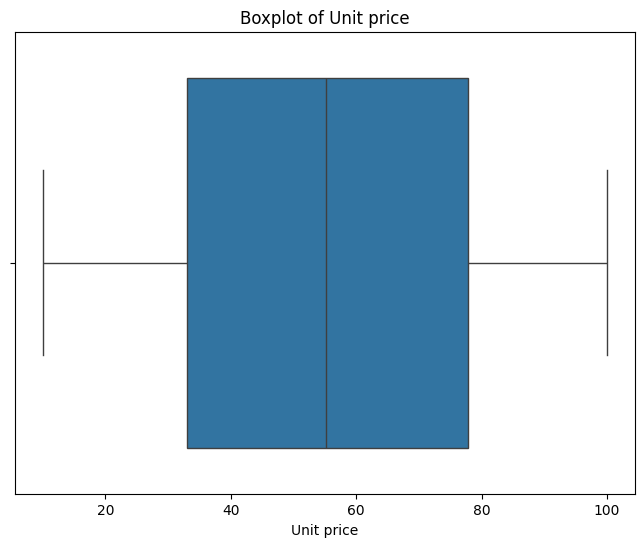

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


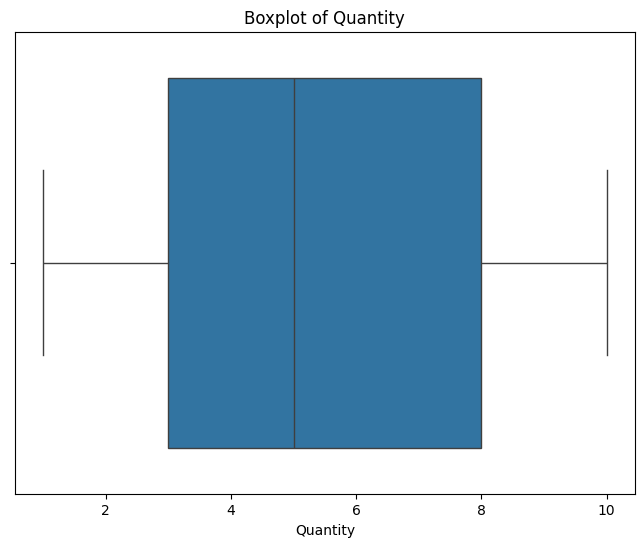

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


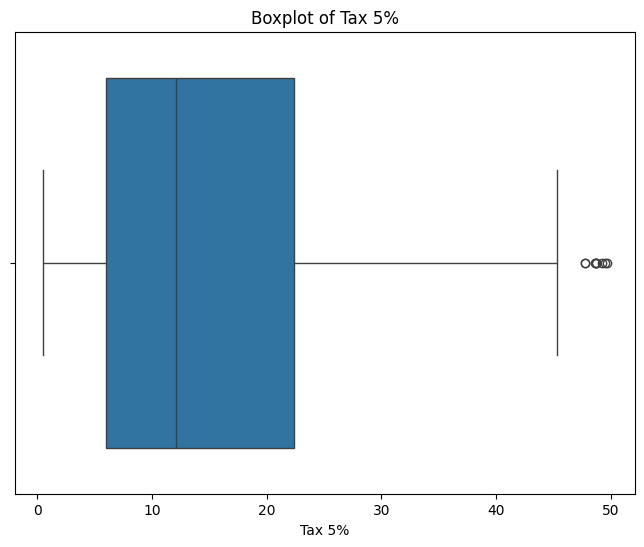

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


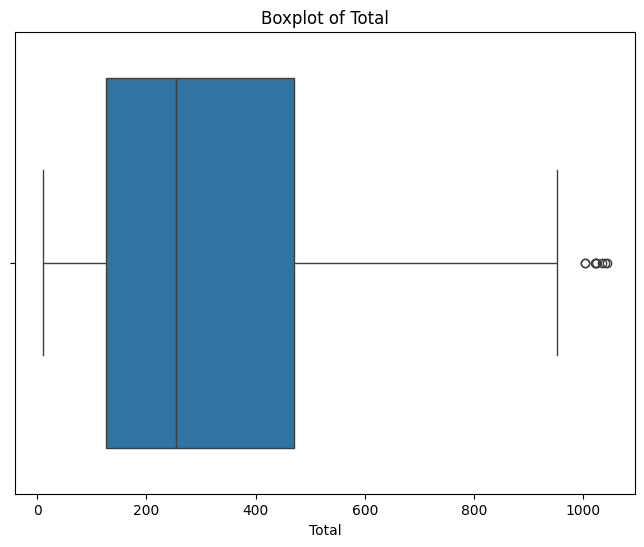

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


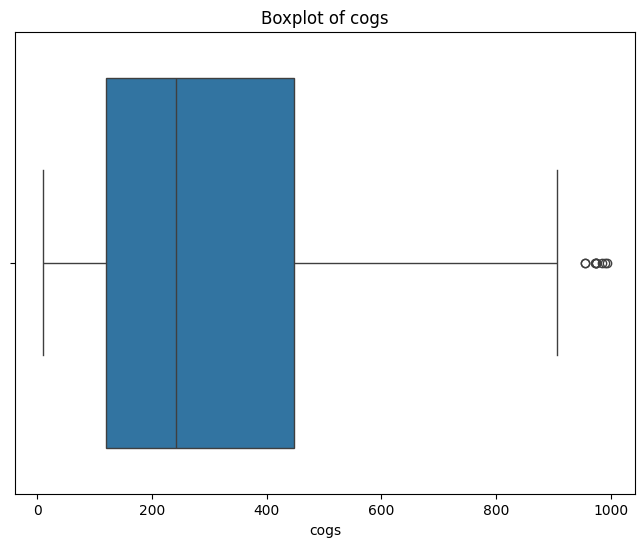

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


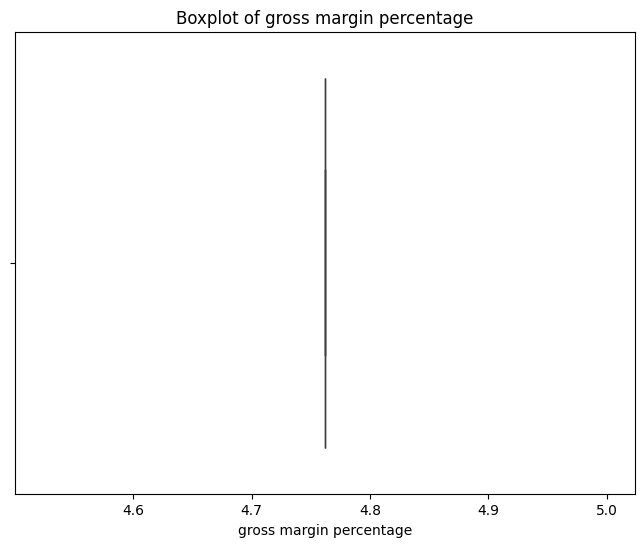

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


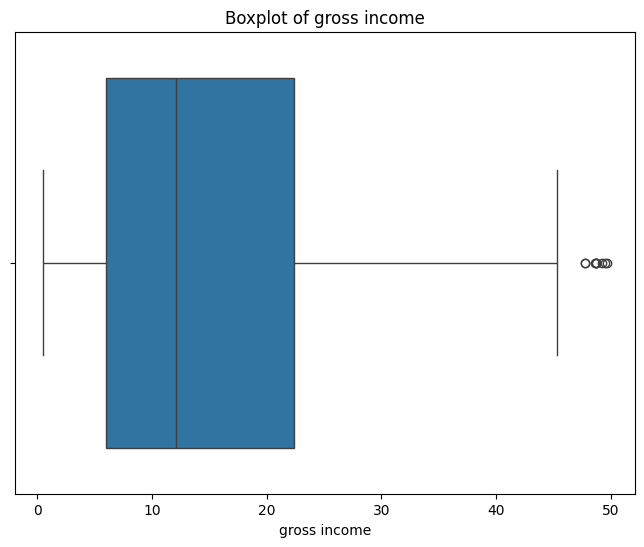

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


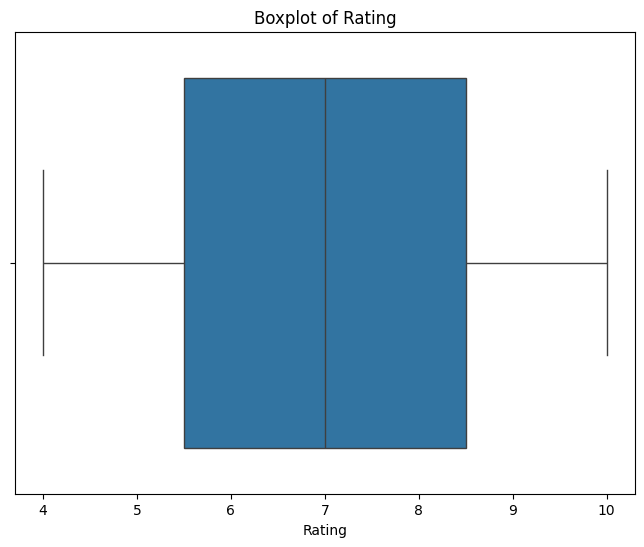

In [33]:
# mengecek outlier nya dengan menggunakan visualisasi

for column in df.select_dtypes(include=['number']).columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[column])
  plt.title(f'Boxplot of {column}')
  plt.show()


Mengetahui Jumlah Outlier dengan statistika deskriptif

In [34]:
for column in df.select_dtypes(include=['number']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f'Jumlah outlier untuk {column}: {outliers.shape[0]}')


Jumlah outlier untuk Unit price: 0
Jumlah outlier untuk Quantity: 0
Jumlah outlier untuk Tax 5%: 9
Jumlah outlier untuk Total: 9
Jumlah outlier untuk cogs: 9
Jumlah outlier untuk gross margin percentage: 0
Jumlah outlier untuk gross income: 9
Jumlah outlier untuk Rating: 0


Mengganti outlier dengan Batas Bawah dan Batas Atas

In [35]:
import pandas as pd
import numpy as np


# Menangani nilai yang hilang terlebih dahulu
for column in ['Tax 5%', 'Total', 'cogs', 'gross income']:
    df[column].fillna(df[column].median(), inplace=True)

# Mengganti outlier
for column in ['Tax 5%', 'Total', 'cogs', 'gross income']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti outlier dengan median
    df[column] = np.where(df[column] < lower_bound, df[column].median(), df[column])
    df[column] = np.where(df[column] > upper_bound, df[column].median(), df[column])

# Menampilkan DataFrame setelah penanganan outlier
print(df.head())




<ipython-input-35-53311f01f4c1>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69       7.0  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28       5.0   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33       7.0  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22       8.0  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31       7.0  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

  4. Mengkategorikan Rating

In [36]:
# Tentukan bins dan labels untuk mengkategorikan rating
bins = [0, 5, 6, 7, 8, 9.5, float('inf')]  # Rentang untuk kategori
labels = ['Sangat Buruk', 'Buruk', 'Cukup', 'Baik', 'Sangat Baik', 'Luar Biasa']  # Label untuk setiap kategori

df['Rating Kategori'] = pd.cut(df['Rating'], bins=bins, labels=labels, include_lowest=True)

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Rating Kategori
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Sangat Baik
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,Luar Biasa
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,Baik
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sangat Baik
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Buruk


Sangat Buruk untuk 0–5,
Buruk untuk 5–6,
Cukup untuk 6–7,
Baik untuk 7–8,
Sangat Baik untuk 8–9.5,
Luar Biasa untuk 9.5 ke atas.